In [7]:
!pip install pyspark

# **Bibliotecas**

In [8]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.functions import vector_to_array

# **Importacao dos dados:**

In [9]:
spark = SparkSession.builder \
    .appName("PCA_Spotify") \
    .getOrCreate()

In [10]:
df = spark.read.csv("spotify_songs.csv", header=True, inferSchema=True)

# **Visualização**

In [11]:
df.show()

+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|            track_id|          track_name|    track_artist|track_popularity|      track_album_id|    track_album_name|track_album_release_date|playlist_name|         playlist_id|playlist_genre|playlist_subgenre|danceability|energy| key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|
+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+----+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|6f807x

In [12]:
df_pd = df.toPandas()
df_pd.head(5)
#Visualização em pandas que é melhor

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [13]:
df.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: integer (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: double (nullable = true)


Algumas colunas estao com o tipo de dado errado, por isso iremos arrumar a classificacao das colunas para posteriormente realizarmos as funcoes.

In [14]:
df = df.withColumn("danceability", col("danceability").cast("double")) \
       .withColumn("energy", col("energy").cast("double")) \
       .withColumn("loudness", col("loudness").cast("double")) \
       .withColumn("key", col("key").cast("int")) \
       .withColumn("mode", col("mode").cast("int"))

In [15]:
df.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: integer (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: double (nullable = true

| Variável                        | Significado                                     |
| ------------------------------- | ----------------------------------------------- |
| **track\_id**                   | ID único da faixa no Spotify.                   |
| **track\_name**                 | Nome da música.                                 |
| **track\_artist**               | Nome do(a) artista.                             |
| **track\_popularity**           | Popularidade da música no Spotify (0 a 100).    |
| **track\_album\_id**            | ID do álbum no Spotify.                         |
| **track\_album\_name**          | Nome do álbum.                                  |
| **track\_album\_release\_date** | Data de lançamento do álbum.                    |
| **playlist\_name**              | Nome da playlist de onde a música foi coletada. |
| **playlist\_id**                | ID da playlist.                                 |
| **playlist\_genre**             | Gênero musical da playlist.                     |
| **playlist\_subgenre**          | Subgênero musical da playlist.                  |
| **danceability**     | Quão dançante é a música. Varia de 0.0 (menos dançante) a 1.0 (mais dançante). Baseado em tempo, ritmo, estabilidade e força do beat. |
| **energy**           | Intensidade e atividade perceptível. Varia de 0.0 (calma) a 1.0 (intensa).                                                            |
| **key**              | Tom musical da música (0 a 11, onde 0 = C, 1 = C♯/D♭, ..., 11 = B).                                                                   |
| **loudness**         | Volume médio da música em decibéis (dB). Valores negativos: -60 (silenciosa) a 0 (alta).                                              |
| **mode**             | Modalidade: 1 = maior, 0 = menor.                                                                                                     |
| **speechiness**      | Presença de palavras faladas. 1.0 = fala pura; 0.0 = nenhuma fala.                                                                    |
| **acousticness**     | Probabilidade de a faixa ser acústica. Valores próximos de 1.0 indicam alta chance.                                                   |
| **instrumentalness** | Indica ausência de vocais. Quanto mais próximo de 1.0, mais instrumental.                                                             |
| **liveness**         | Indica presença de público ao vivo. Valores altos indicam show ao vivo.                                                               |
| **valence**          | Positividade/alegria da música. 1.0 = muito feliz, 0.0 = triste/melancólica.                                                          |
| **tempo**            | Tempo da música em batidas por minuto (BPM).                                                                                          |
| **duration\_ms**     | Duração da música em milissegundos.                                                                                                                           |



# Verificação de dados faltantes

In [16]:
valores_faltantes = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
valores_faltantes.show()
#Não tem nenhum valor faltante na tabela

+--------+----------+------------+----------------+--------------+----------------+------------------------+-------------+-----------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+
|track_id|track_name|track_artist|track_popularity|track_album_id|track_album_name|track_album_release_date|playlist_name|playlist_id|playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo|duration_ms|
+--------+----------+------------+----------------+--------------+----------------+------------------------+-------------+-----------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+
|       0|         0|           0|               0|             0|               0|                       0|            0|          0|             0|  

# Verificar se a linhas duplicadas

In [17]:
duplicatas = df.count() - df.dropDuplicates().count()
print(f"Número de linhas duplicadas: {duplicatas}")
#Não a linhas inteiras duplicadas tambem

Número de linhas duplicadas: 0


# Tipos de dados

In [18]:
colunas_escritas = [f.name for f in df.schema.fields if f.dataType.simpleString() == 'string']
colunas_numericas = [f.name for f in df.schema.fields if f.dataType.simpleString() in ['int', 'double', 'float', 'long']]
print("Colunas escritas:", colunas_escritas)
print("Colunas numéricas:", colunas_numericas)

Colunas escritas: ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre']
Colunas numéricas: ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


# Plot de graficos para visualização da distribuicao dos dados em cada variavel


**track_popularity**

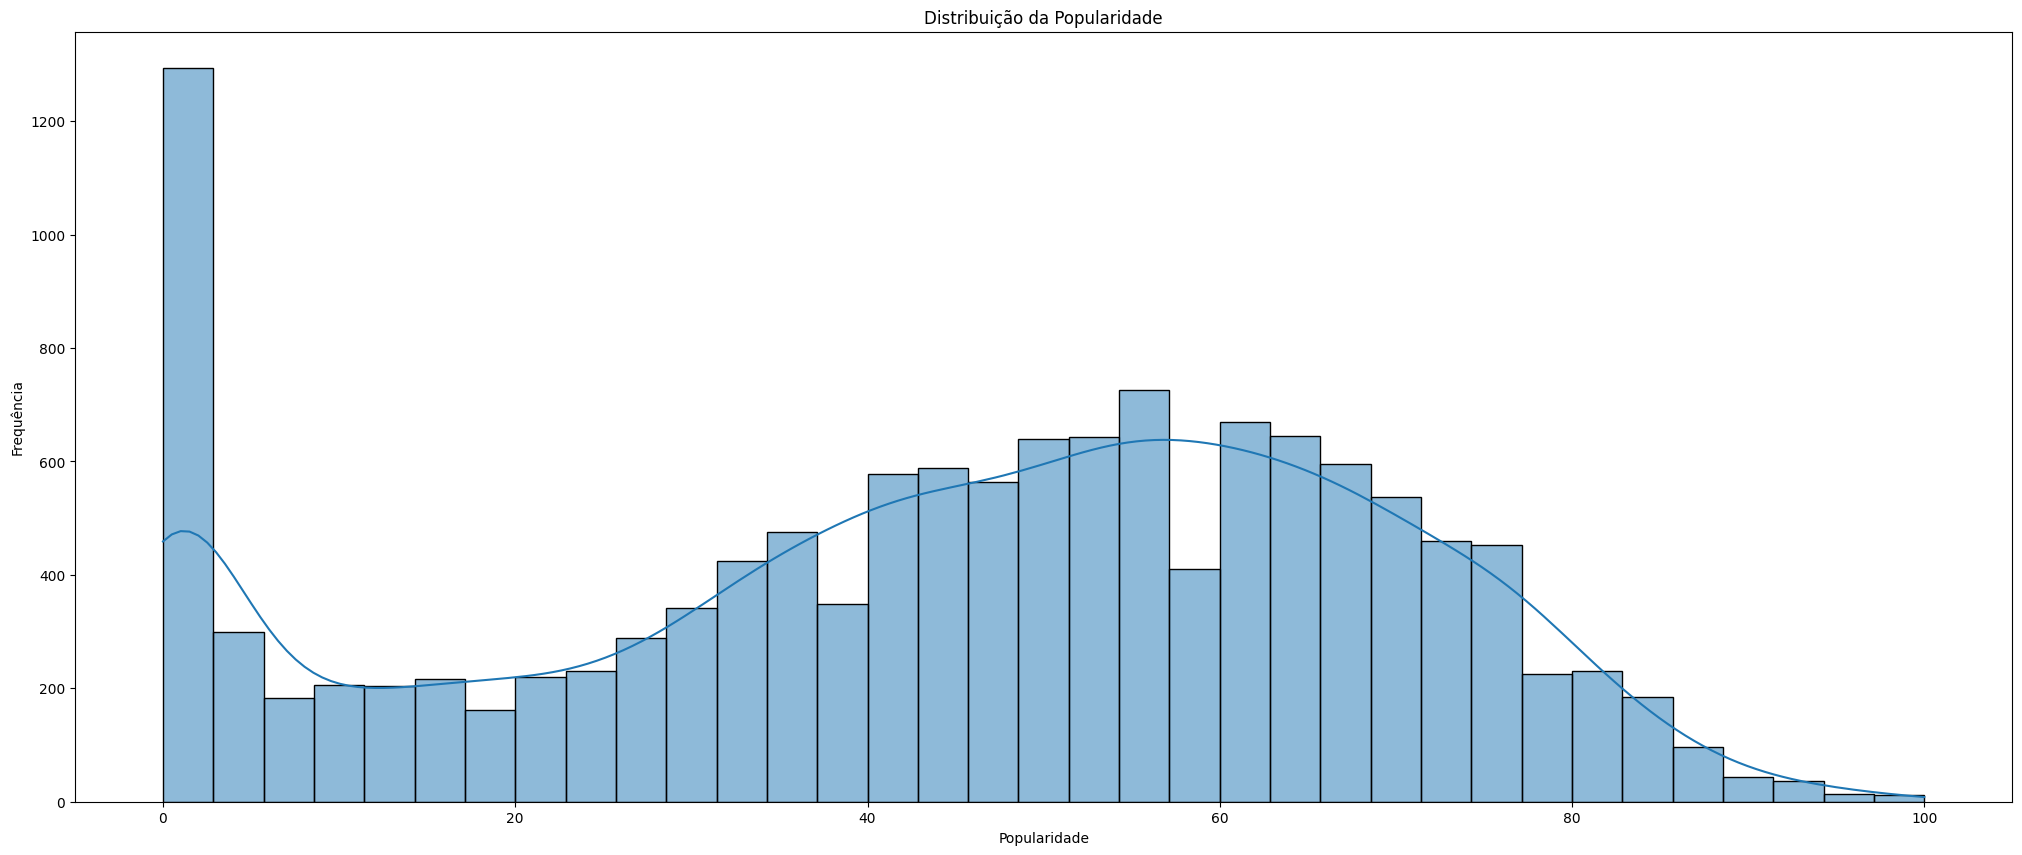

In [19]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['track_popularity'], kde=True)
plt.title("Distribuição da Popularidade")
plt.xlabel("Popularidade")
plt.ylabel("Frequência")
plt.show()

**speechiness**

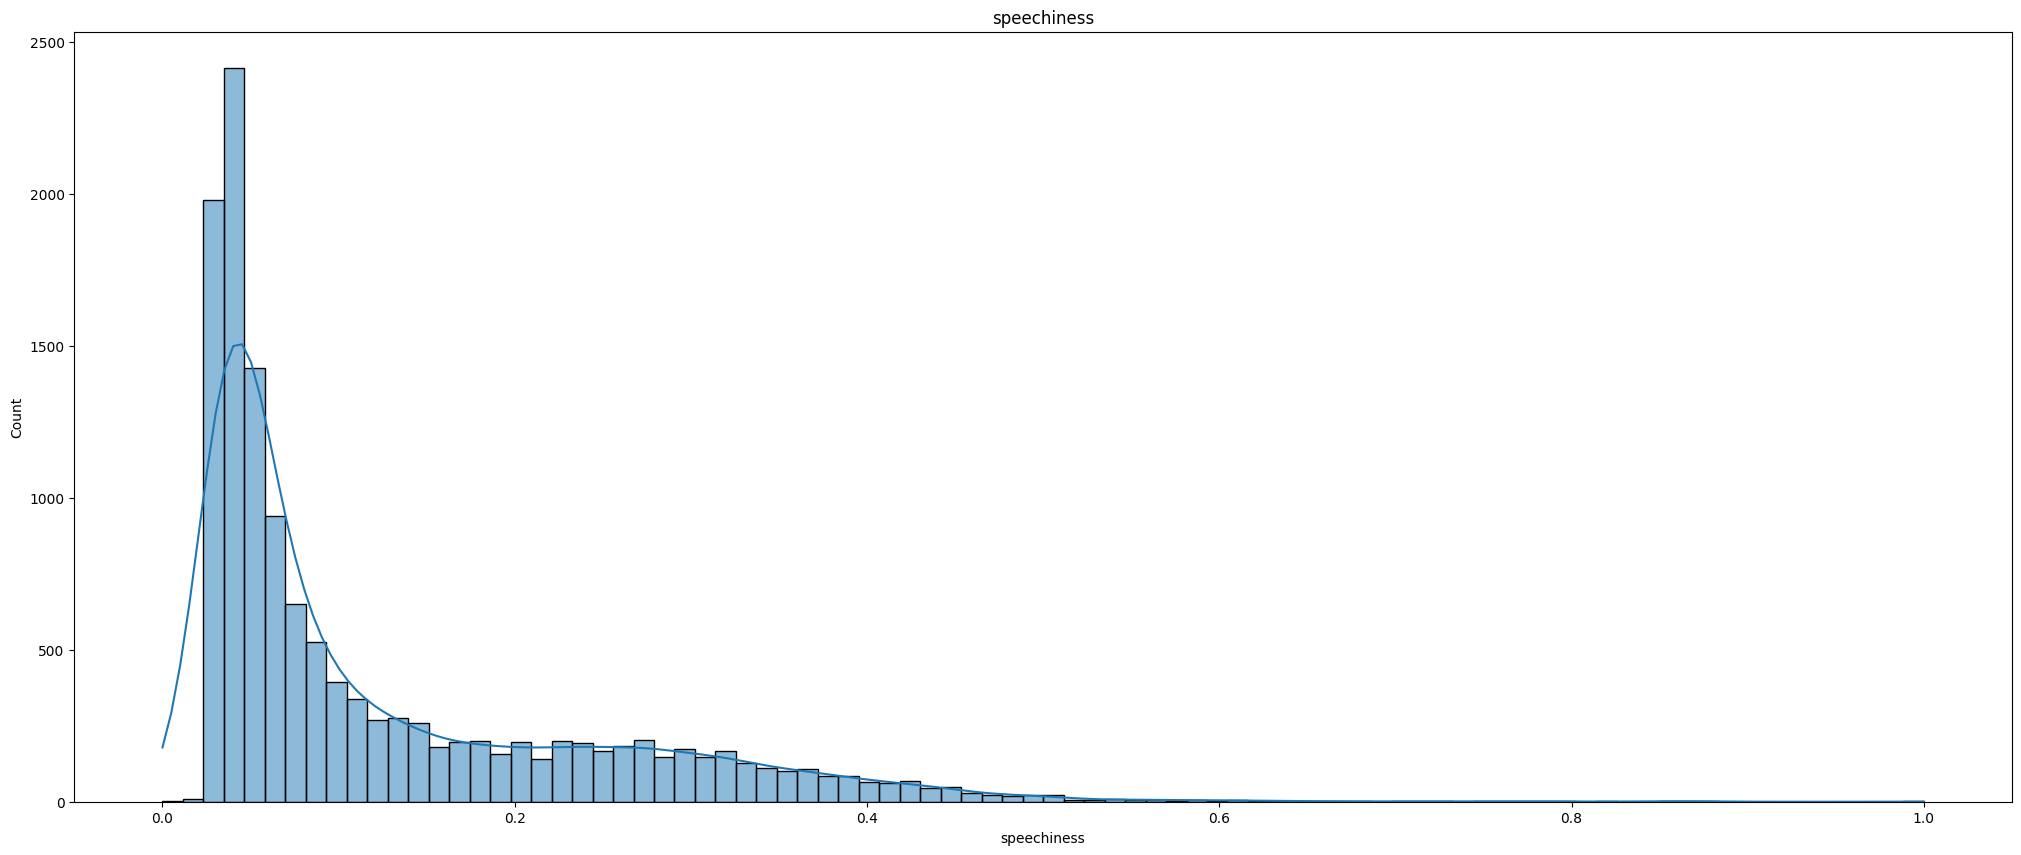

In [20]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['speechiness'], kde=True)
plt.title("speechiness")
plt.show()

**acousticness**

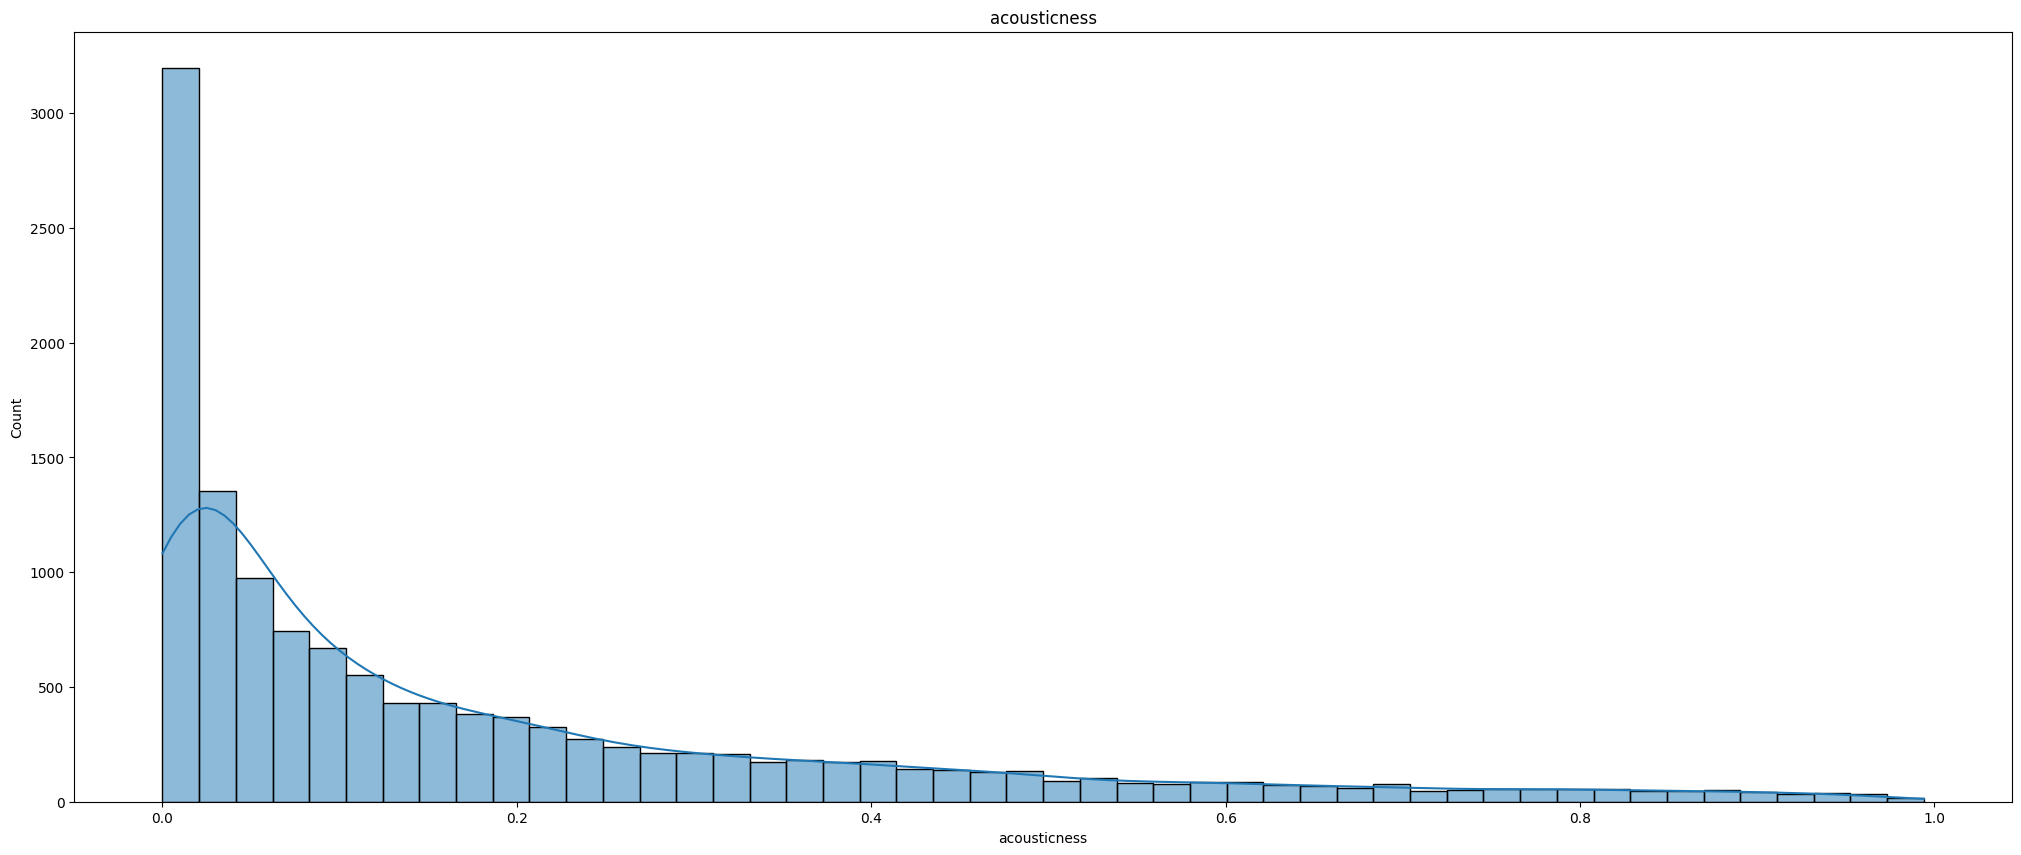

In [21]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['acousticness'], kde=True)
plt.title("acousticness")
plt.show()

**valence**

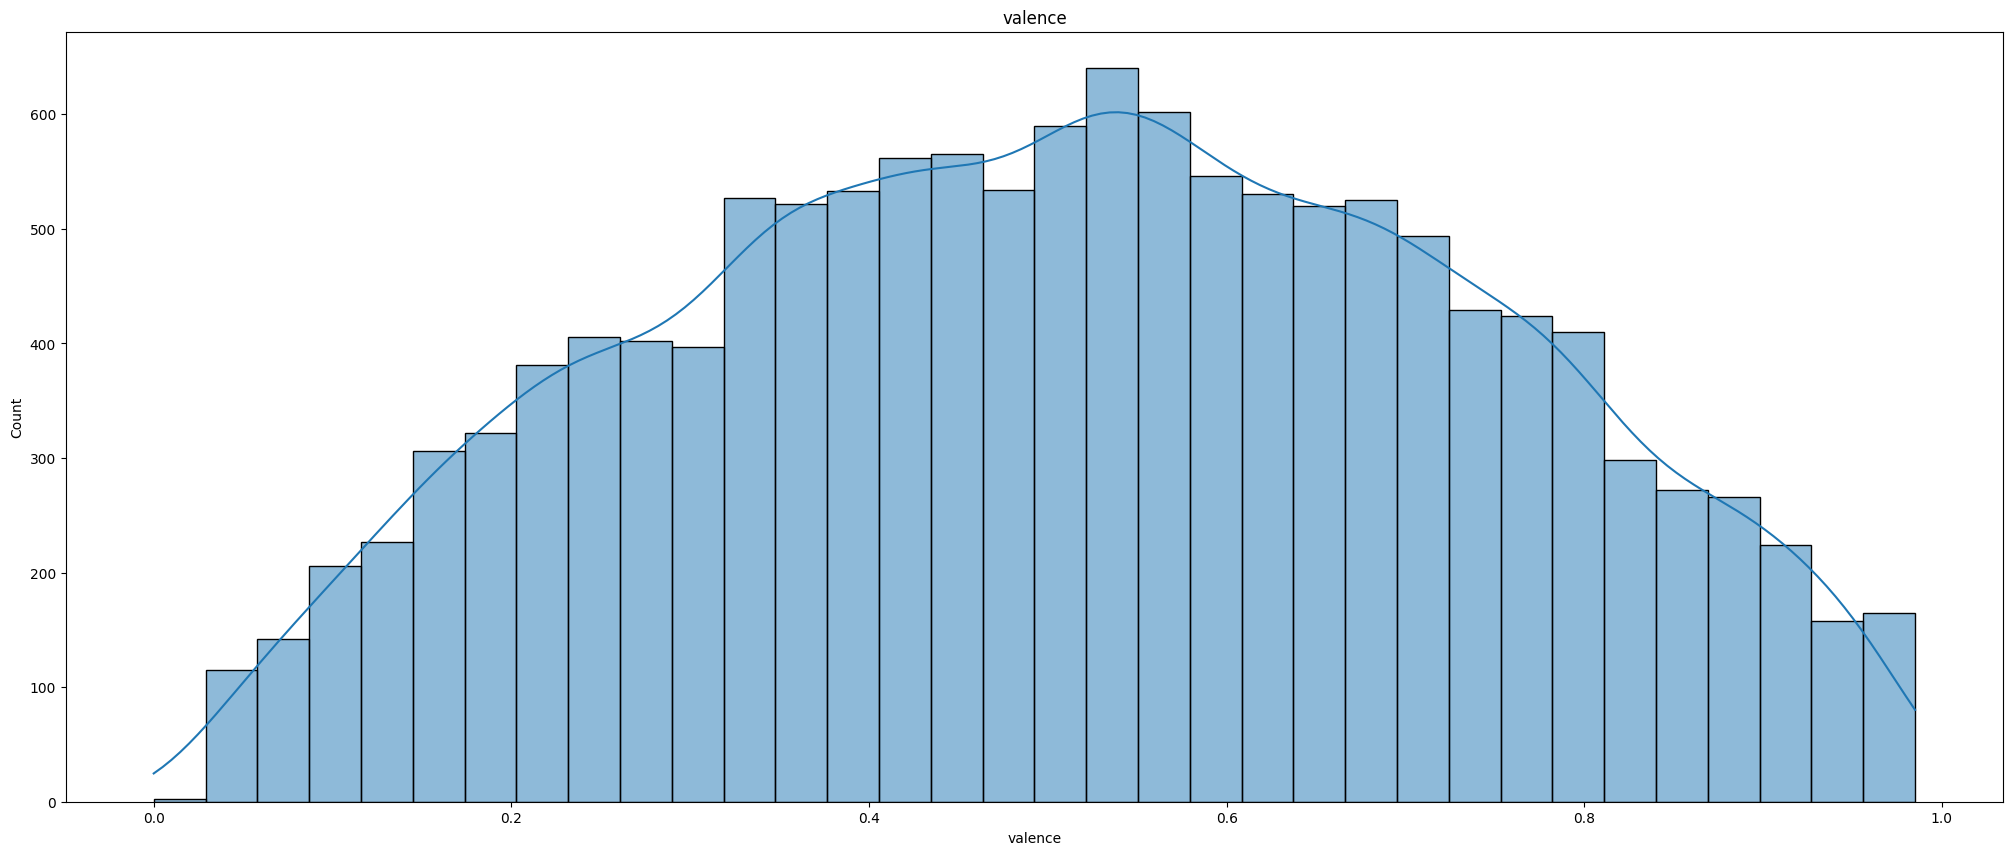

In [22]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['valence'], kde=True)
plt.title("valence")
plt.show()

**liveness**

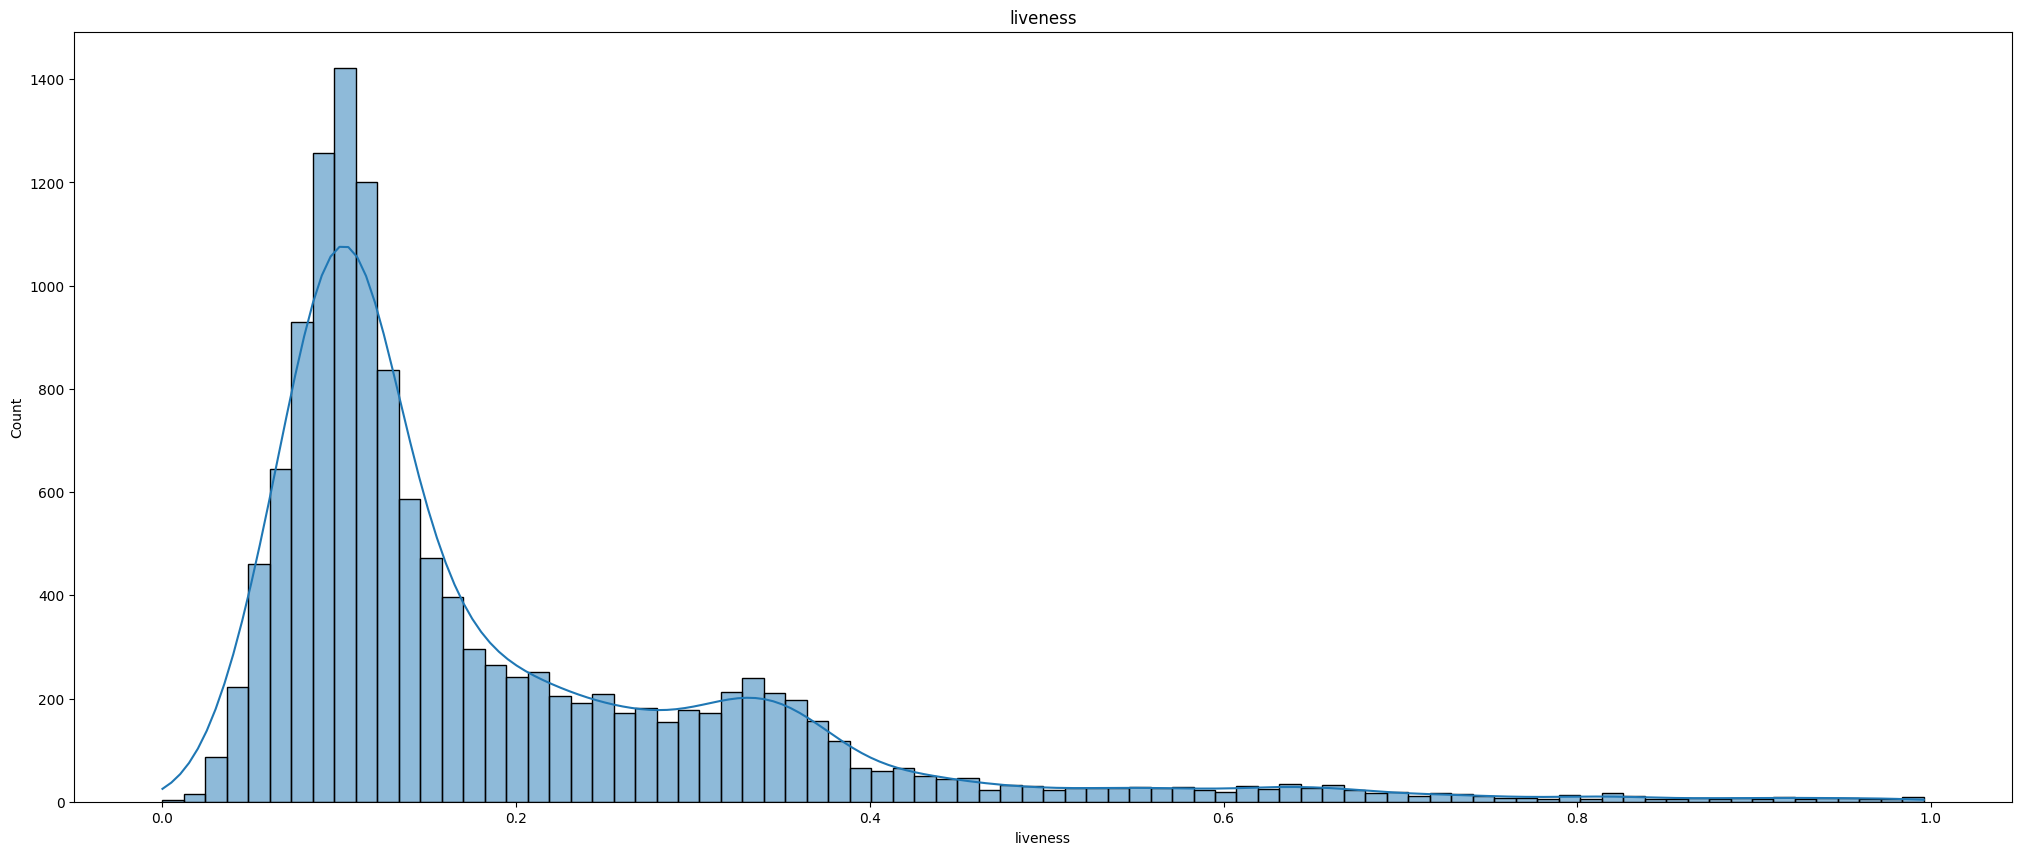

In [23]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['liveness'], kde=True)
plt.title("liveness")
plt.show()

**tempo**

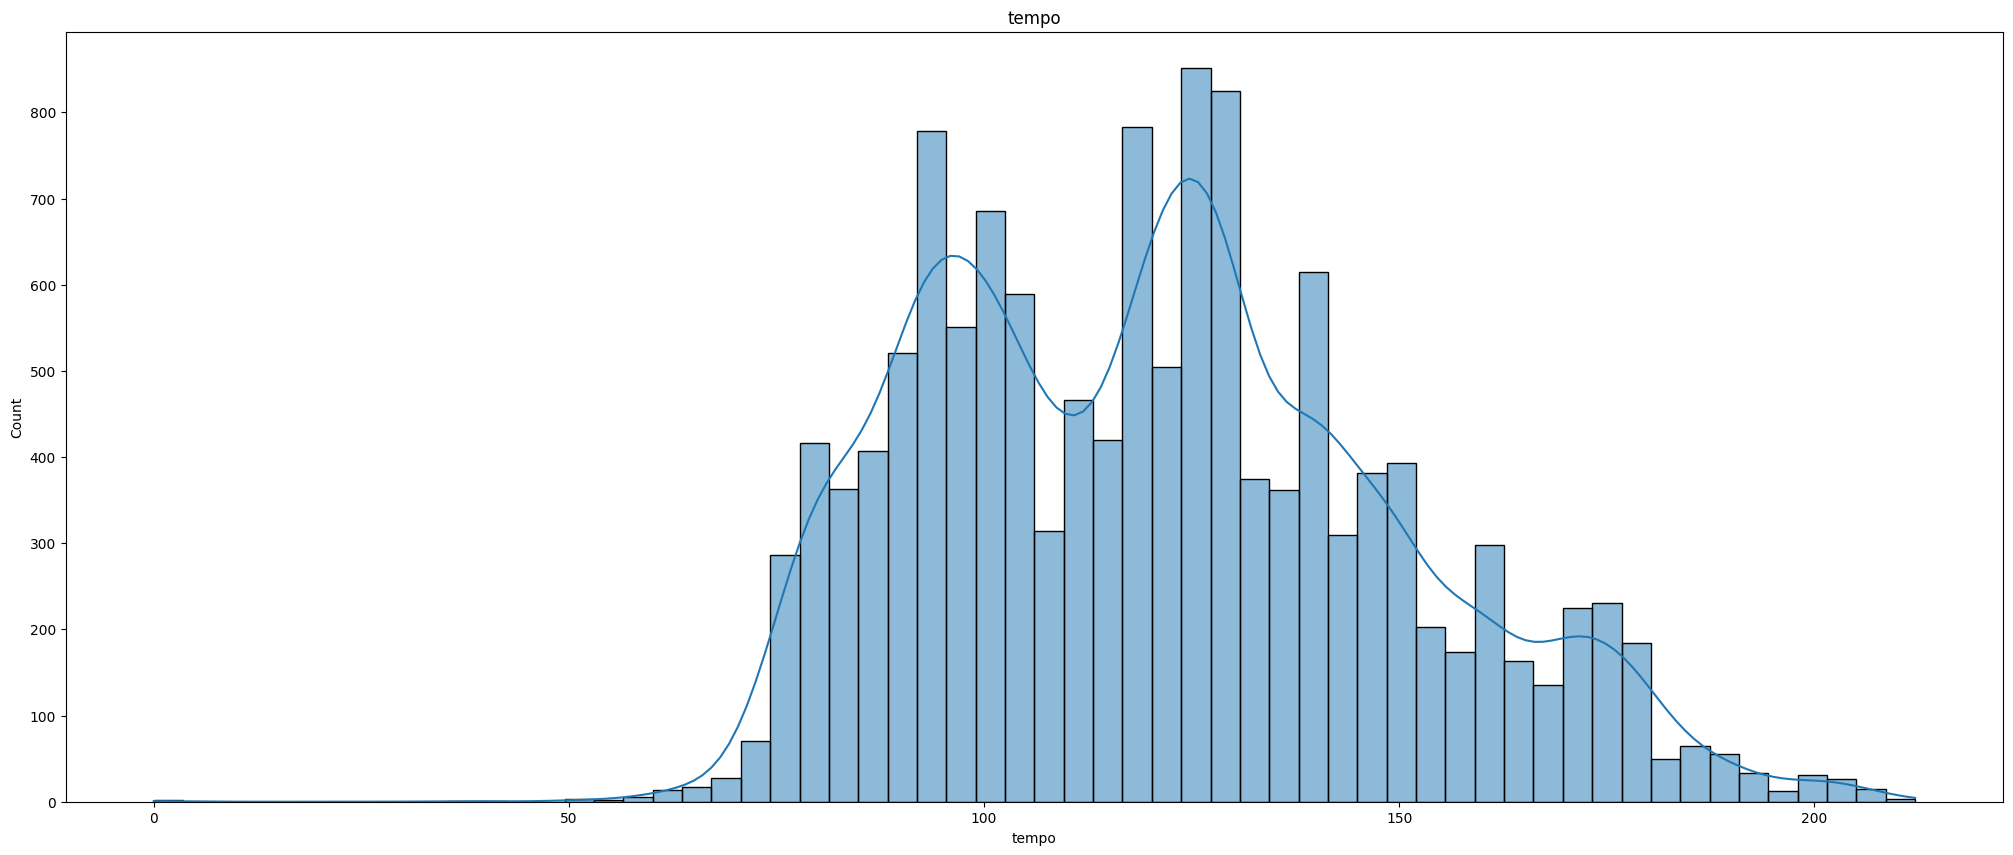

In [24]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['tempo'], kde=True)
plt.title("tempo")
plt.show()

**duration_ms**

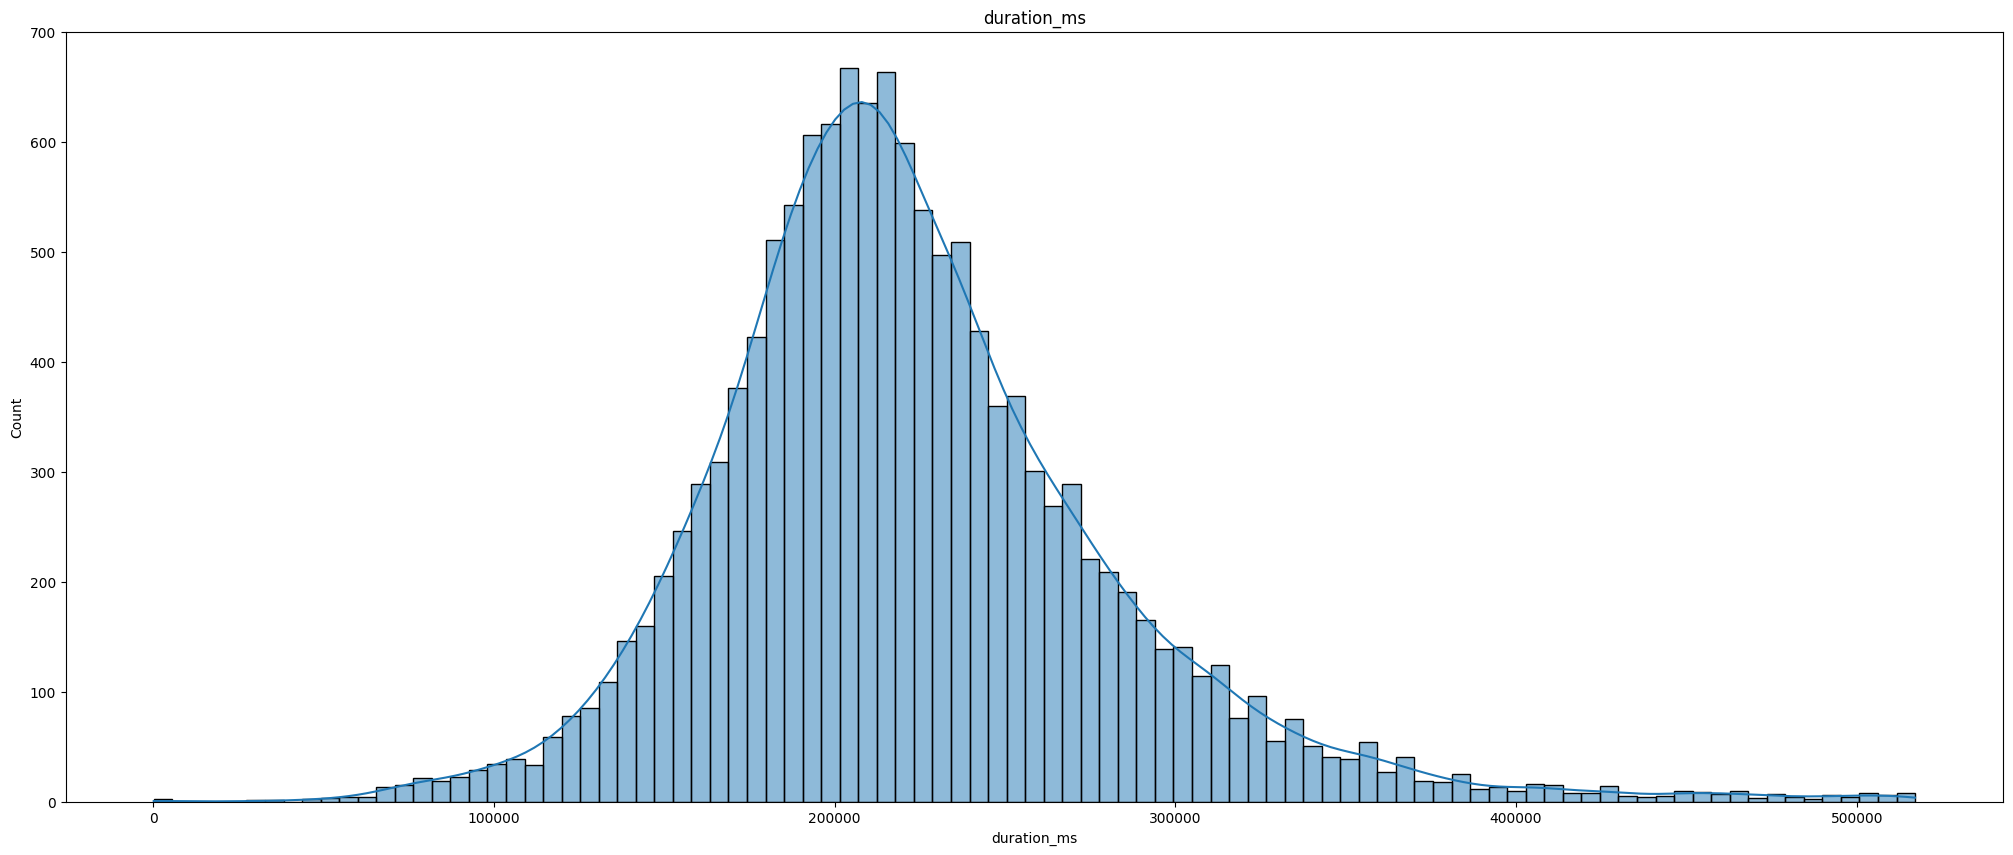

In [25]:
plt.figure(figsize=(25,10))
sns.histplot(df_pd['duration_ms'], kde=True)
plt.title("duration_ms")
plt.show()

In [26]:
df.select("track_name", "track_artist", "track_popularity") \
  .orderBy(col("track_popularity").desc()) \
  .show(10, truncate=False)

+---------------+------------+----------------+
|track_name     |track_artist|track_popularity|
+---------------+------------+----------------+
|Dance Monkey   |Tones and I |100             |
|Memories       |Maroon 5    |98              |
|Tusa           |KAROL G     |98              |
|Memories       |Maroon 5    |98              |
|Blinding Lights|The Weeknd  |98              |
|Circles        |Post Malone |98              |
|Tusa           |KAROL G     |98              |
|Blinding Lights|The Weeknd  |98              |
|Blinding Lights|The Weeknd  |98              |
|The Box        |Roddy Ricch |98              |
+---------------+------------+----------------+
only showing top 10 rows



# **PCA**

1. Primeiro vamos selecionar as colunas numericas relevantes para realizacao do PCA.

> OBS: Não usamos key e mode no PCA diretamente porque elas não representam bem uma variação numérica contínua significativa para os componentes principais.

In [27]:
#Selecionar as colunas numéricas desejadas
feature_cols = [
    "danceability", "energy", "loudness", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
]
df_selected = df.select(*feature_cols)
#Eliminar linhas com valores nulos
df_clean = df_selected.dropna()
#Transformar as colunas numéricas em vetor e adicionar índice
df_vector = df_clean.rdd.map(lambda row: Vectors.dense(row)).zipWithIndex() \
    .map(lambda row: (row[1], row[0])).toDF(["id", "features"])

#Aplicar PCA com 2 componentes
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
model = pca.fit(df_vector)
result = model.transform(df_vector)

#Mostrar os resultados
result.select("id", "pca_features").show(truncate=False)

+---+----------------------------------------+
|id |pca_features                            |
+---+----------------------------------------+
|0  |[194754.00067218952,-120.93528094487584]|
|1  |[162600.0005532685,-99.02838818176541]  |
|2  |[176616.0006841474,-123.00005564263162] |
|3  |[169093.00067330003,-120.98646818127499]|
|4  |[189052.0006849068,-122.88845884631584] |
|5  |[163049.00069155166,-124.03129583464812]|
|6  |[187675.0006226222,-111.56752732055227] |
|7  |[207619.00070443703,-126.76631642956382]|
|8  |[193187.0007007407,-125.9146540002183]  |
|9  |[253040.000689195,-123.5181556885832]   |
|10 |[207894.00067529894,-120.77650835694043]|
|11 |[203733.0006802453,-121.95450323354696] |
|12 |[192507.00067387472,-120.87837812354972]|
|13 |[164516.00068491264,-122.96873714910036]|
|14 |[255238.00069518655,-124.61989993527104]|
|15 |[188230.00069061166,-123.94542365392456]|
|16 |[173548.0006522225,-117.05222670209065] |
|17 |[189375.00066354594,-118.90728882835195]|
|18 |[159404.